# Checking SNR evolution vs. NA (simulation)
just to be sure how to normalize SNR

In [1]:
# %% init
from IPython import get_ipython
import matplotlib.pylab as plt
import mrs.reco as reco
import mrs.log as log
import mrs.paths as default_paths
import mrs.sim as sim
import mrs.aliases as xxx
import numpy as np
get_ipython().magic("clear")
plt.close("all")

get_ipython().magic("matplotlib notebook")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.max_open_warning'] = 1000
log.setLevel(log.DEBUG)

import os
os.chdir("/home/tangir/crmbm/python/shrimp")

(DEBUG) Loaded backend nbAgg version unknown.


## Simulate noisy NAA spectra

In [2]:
te = 55.0

meta_bs = sim.metabolite_basis_set()
meta_bs.initialize()

seq = sim.mrs_seq_eja_svs_slaser(te)
seq.pulse_rfc_r = 50.0
seq.pulse_rfc_optim_power_enable = True
seq.initialize(meta_bs)

p = sim.params(meta_bs)
p[:, xxx.p_cm] = 0.0
p[xxx.m_NAA_CH3, xxx.p_dd] = 20.0
p[xxx.m_NAA_CH3, xxx.p_cm] = 1.0

(INFO)  metabolite_basis_set.initialize: initializing metabolite database...
(INFO)  metabolite_basis_set._read_xls_file: reading metabolite basis set from XLS file...
(DEBUG) metabolite_basis_set._write_header_file: generating metabolite and parameter aliases...
(INFO)  mrs_seq_eja_svs_slaser.initialize: initializing sequence using pyGAMMA...
(DEBUG) mrs_seq_eja_svs_slaser._init_pulses: not using real shaped pulses so nothing to do here!
(INFO)  mrs_seq_eja_svs_slaser._compute_metabolite_signals: simulating MRS signal for metabolite [Ala/Ala]...
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: acquiring sLASER sequence: (90)-(180)-(180)-(180)-(180)...
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: preparing spin system
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: done. (real TE=55.00ms)
(INFO)  mrs_seq_eja_svs_slaser._compute_metabolite_signals: simulating MRS signal for metabolite [Alcar/Alcar_CH3]...
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: acquiring sLASER sequence: (90)-(

(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: acquiring sLASER sequence: (90)-(180)-(180)-(180)-(180)...
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: preparing spin system
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: done. (real TE=55.00ms)
(INFO)  mrs_seq_eja_svs_slaser._compute_metabolite_signals: simulating MRS signal for metabolite [GPC/GPC_PC_CH3]...
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: acquiring sLASER sequence: (90)-(180)-(180)-(180)-(180)...
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: preparing spin system
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: simplifying the spin system
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: done. (real TE=55.00ms)
(INFO)  mrs_seq_eja_svs_slaser._compute_metabolite_signals: simulating MRS signal for metabolite [Gsh/Gsh_Gly]...
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: acquiring sLASER sequence: (90)-(180)-(180)-(180)-(180)...
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: preparing spin system
(DEBUG) 

(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: preparing spin system
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: done. (real TE=55.00ms)
(INFO)  mrs_seq_eja_svs_slaser._compute_metabolite_signals: simulating MRS signal for metabolite [MM4/MM4]...
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: acquiring sLASER sequence: (90)-(180)-(180)-(180)-(180)...
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: preparing spin system
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: done. (real TE=55.00ms)
(INFO)  mrs_seq_eja_svs_slaser._compute_metabolite_signals: simulating MRS signal for metabolite [Lip1/Lip1]...
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: acquiring sLASER sequence: (90)-(180)-(180)-(180)-(180)...
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: preparing spin system
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: done. (real TE=55.00ms)
(INFO)  mrs_seq_eja_svs_slaser._compute_metabolite_signals: simulating MRS signal for metabolite [Lip2/Lip2]...
(DEBUG) mrs_seq_eja_s

## Increment NA and measure SNR

In [3]:
na_list = range(1, 128, 8)
snr_list = []
for na in na_list:
    s = seq.simulate_signal(p, 0.2, na)
    snr, s, n = s.analyze_snr_1d([1.2, 2.5], [-1, 0], False, True)
    snr_list.append(snr)


(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: adding complex gaussian noise, std. deviation = 0.2
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 2.33E-01
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...


<IPython.core.display.Javascript object>

(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 2.11E+02, N = 2.52E+01, SNR = 8.37!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: ███████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 6.26E-01
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 1.77E+03, N = 7.69E+01, SNR = 23.04!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: █████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 7.76E-01
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 3.31E+03, N = 1.05E+02, SNR = 31.68!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: █████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 9.75E-01
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 4.87E+03, N = 1.22E+02, SNR = 39.76!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: ██████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 1.10E+00
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 6.38E+03, N = 1.52E+02, SNR = 41.99!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: ██████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 1.41E+00
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 7.82E+03, N = 1.67E+02, SNR = 46.89!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: ██████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 1.37E+00
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 9.34E+03, N = 1.83E+02, SNR = 50.94!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: ██████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 1.63E+00
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 1.07E+04, N = 1.90E+02, SNR = 56.30!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: ██████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 1.69E+00
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 1.24E+04, N = 2.03E+02, SNR = 60.94!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: ██████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 1.59E+00
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 1.39E+04, N = 2.20E+02, SNR = 63.13!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: ██████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 1.69E+00
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 1.54E+04, N = 2.38E+02, SNR = 64.65!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: ██████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 2.08E+00
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 1.69E+04, N = 2.43E+02, SNR = 69.62!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: ██████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 2.07E+00
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 1.86E+04, N = 2.53E+02, SNR = 73.50!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: ██████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 1.94E+00
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 1.95E+04, N = 2.71E+02, SNR = 71.98!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: ██████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 2.15E+00
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 2.13E+04, N = 2.74E+02, SNR = 77.77!
(INFO)  mrs_seq_eja_svs_slaser.simulate_signal: simulating signal...


averaging: ██████████████████████████████ done.


(DEBUG) MRSData2.analyze_noise_1d: estimating noise level for [None]...
(DEBUG) MRSData2.analyze_noise_1d: estimating noise level in FID using last 100 points...
(INFO)  MRSData2.analyze_noise_1d: noise level = 1.91E+00
(DEBUG) MRSData2.analyze_snr_1d: analyzing SNR for [simulated MRS signal]...
(DEBUG) MRSData2.analyze_snr_1d: going to analyze the REAL spectrum...
(DEBUG) MRSData2.analyze_snr_1d: by measuring the intensity at 2.01ppm!
(DEBUG) MRSData2.analyze_snr_1d: estimating noise from -1.00 to 0.00ppm region!
(INFO)  MRSData2.analyze_snr_1d: results for [simulated MRS signal] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 2.27E+04, N = 2.88E+02, SNR = 78.89!


## Plot SNR dependance with NA

<IPython.core.display.Javascript object>


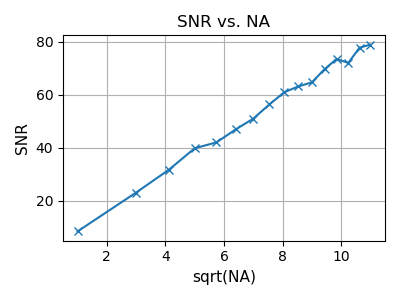

In [16]:
fig, ax = plt.subplots()
sc = ax.plot(np.sqrt(na_list), snr_list, 'x-')
ax.set_xlabel("sqrt(NA)", fontsize=11)
ax.set_ylabel("SNR", fontsize=11)
ax.set_title("SNR vs. NA")
ax.grid(True)

fig.tight_layout()
plt.show()